In [1]:
# !pip3 install autogluon mxnet --upgrade
# !pip3 install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# removed this like and replaced below
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Load Data

In [4]:
df = pd.read_csv('./used_cars_cleaned.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# df = pd.read_csv('used_cars_cleaned.csv')
df = df.drop('Unnamed: 0', 1)

In [6]:
train, test = train_test_split(df, train_size = 0.01, test_size = 0.01, random_state=42)

# Auto ML

In [7]:
from autogluon.tabular import TabularPredictor
    
label = 'price'    
predictor = TabularPredictor(label=label).fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20211022_185554/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211022_185554/"
AutoGluon Version:  0.3.1
Train Data Rows:    21602
Train Data Columns: 46
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (146900.0, 800.0, 28415.5227, 15421.12397)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    25747.16 MB
	Train Data (Original)  Memory Usage: 30.4 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manua

[1000]	train_set's rmse: 1709.39	valid_set's rmse: 3079.26
[2000]	train_set's rmse: 1256.37	valid_set's rmse: 3028.61
[3000]	train_set's rmse: 975.642	valid_set's rmse: 3018.16
[4000]	train_set's rmse: 779.676	valid_set's rmse: 3015.8


	-3015.0976	 = Validation score   (root_mean_squared_error)
	32.87s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: LightGBM ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 1208.47	valid_set's rmse: 3038.52
[2000]	train_set's rmse: 744.392	valid_set's rmse: 3018.72


	-3016.1023	 = Validation score   (root_mean_squared_error)
	26.09s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3941.0663	 = Validation score   (root_mean_squared_error)
	218.87s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: CatBoost ...
	-2889.7719	 = Validation score   (root_mean_squared_error)
	241.63s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-3705.8734	 = Validation score   (root_mean_squared_error)
	199.74s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3498.8914	 = Validation score   (root_mean_squared_error)
	75.99s	 = Training   runtime
	1.45s	 = Validation runtime
Fitting model: XGBoost ...
	-3160.9968	 = Validation score   (root_mean_squared_error)
	26.65s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	-4675.406	 = Validation score   (root_mean_squared_error)
	299.62s	 = Training   runtime
	

In [8]:
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2869.574799,-2752.756709,27.484807,2.598867,405.023950,0.024586,0.000592,0.483578,2,True,12
1,CatBoost,-2980.668786,-2889.771885,0.883516,0.174105,241.629647,0.883516,0.174105,241.629647,1,True,6
2,LightGBMXT,-3049.396811,-3015.097617,4.037323,0.398386,32.871430,4.037323,0.398386,32.871430,1,True,3
3,LightGBMLarge,-3093.803930,-3038.438771,2.384253,0.252989,27.958622,2.384253,0.252989,27.958622,1,True,11
4,LightGBM,-3117.335758,-3016.102343,3.151842,0.325411,26.092741,3.151842,0.325411,26.092741,1,True,4
5,XGBoost,-3198.872430,-3160.996767,1.994292,0.133219,26.645494,1.994292,0.133219,26.645494,1,True,9
6,NeuralNetMXNet,-3604.276600,-4675.405983,5.221330,0.554590,299.617936,5.221330,0.554590,299.617936,1,True,10
7,NeuralNetFastAI,-3639.262267,-3498.891383,17.003287,1.447384,75.987933,17.003287,1.447384,75.987933,1,True,8
8,ExtraTreesMSE,-3693.615245,-3705.873398,1.659816,0.233480,199.736655,1.659816,0.233480,199.736655,1,True,7
9,RandomForestMSE,-3756.461714,-3941.066314,1.576082,0.230083,218.870223,1.576082,0.230083,218.870223,1,True,5


In [9]:
predictor.feature_importance(test)

Computing feature importance via permutation shuffling for 46 features using 1000 rows with 3 shuffle sets...
	298.96s	= Expected runtime (99.65s per shuffle set)
	193.99s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
horsepower,4500.875948,10.472026,9.022250e-07,3,4560.881816,4440.870081
year,3938.246680,465.922809,2.316565e-03,3,6608.036044,1268.457317
mileage,3554.452152,373.367332,1.828892e-03,3,5693.888367,1415.015938
trim_name,1211.398477,240.747712,6.455419e-03,3,2590.909562,-168.112607
model_name,1081.184404,92.072174,1.204300e-03,3,1608.768169,553.600638
major_options,962.297336,197.051560,6.845406e-03,3,2091.424624,-166.829953
make_name,960.333272,175.539056,5.477344e-03,3,1966.191529,-45.524986
is_new,259.877623,59.333743,8.467819e-03,3,599.866548,-80.111303
wheel_system,243.419570,89.655487,2.118308e-02,3,757.155454,-270.316314
height,183.998042,52.340523,1.296425e-02,3,483.915041,-115.918958


In [10]:
preds = predictor.predict(test.drop(columns=[label]))
r2(preds, test[label])

0.9631354071851316

# Data encoding

**Cannot include major_options, dealer_zip, latitude, longitude, trim_name, make_name, model_name, and city due to limited resources.**

**Only keep features with feature_importance > 20**

In [11]:
y = df.price
X1 = pd.get_dummies(df[['frame_damaged', 'has_accidents', 'salvage', 
                       'franchise_make', 'wheel_system', 
                       'fuel_type', 'body_type', 'is_new',  
                       'engine_type_simple']])

X2 = df[['owner_count', 
        'horsepower', 'back_legroom', 
        'fuel_tank_volume','height', 'length', 'maximum_seating', 
        'wheelbase', 'width', 'mileage', 'seller_rating', 'year',
        'torque_1', 'torque_2', 'power_1']]

pd.options.mode.chained_assignment = None

X2.fillna(df.median(), inplace=True)

X = pd.concat([X1, X2], axis=1, join='inner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Linear Regression

In [12]:
# Standard linear regression
lr = linear_model.LinearRegression().fit(X_train, y_train)
print(pd.DataFrame(zip(X_train.columns, lr.coef_)))
print('\nintercept:', lr.intercept_)
print('r2 of training data:', lr.score(X_train, y_train))
print('r2 of test data:', lr.score(X_test,y_test))
pred = lr.predict(X_test)
print('mse', mse(pred, y_test))

                       0            1
0                 is_new  6363.173181
1    frame_damaged_False     6.440825
2     frame_damaged_True  -982.168455
3    has_accidents_False  -256.859785
4     has_accidents_True  -718.867908
..                   ...          ...
100        seller_rating   449.957748
101                 year   724.118839
102             torque_1     9.488835
103             torque_2    -0.323353
104              power_1   -20.524994

[105 rows x 2 columns]

intercept: -1483834.3431529817
r2 of training data: 0.8210526982558193
r2 of test data: 0.821857795336264
mse 42569009.13281449


In [13]:
# Ridge regression (lambda = 1)
ridge = linear_model.Ridge(alpha=1.0).fit(X_train, y_train)
print(pd.DataFrame(zip(X_train.columns, ridge.coef_)))
print('\nintercept:', ridge.intercept_)
print('r2 of training data:', ridge.score(X_train, y_train))
print('r2 of test data:', ridge.score(X_test,y_test))
pred = ridge.predict(X_test)
print('mse', mse(pred, y_test))

                       0            1
0                 is_new  6362.892105
1    frame_damaged_False     6.495579
2     frame_damaged_True  -983.318451
3    has_accidents_False  -257.256311
4     has_accidents_True  -719.566551
..                   ...          ...
100        seller_rating   450.478284
101                 year   723.833628
102             torque_1     9.484988
103             torque_2    -0.323659
104              power_1   -20.514053

[105 rows x 2 columns]

intercept: -1483464.9276652155
r2 of training data: 0.8210461980612829
r2 of test data: 0.8218518857553097
mse 42570421.2911859


In [14]:
# Lasso regression (lambda = 0.1)
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
pred = lasso.predict(X_test)
print(pd.DataFrame(zip(X_train.columns, lasso.coef_)))
print('\nintercept:', lasso.intercept_)
print('r2 of training data:', lasso.score(X_train, y_train))
print('r2 of test data:', lasso.score(X_test,y_test))
print('mse', mse(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13019688556106.062, tolerance: 15444423740.672333
  positive)


                       0            1
0                 is_new  6355.611230
1    frame_damaged_False   441.887726
2     frame_damaged_True  -529.884328
3    has_accidents_False   129.461659
4     has_accidents_True  -333.212263
..                   ...          ...
100        seller_rating   452.216859
101                 year   723.144634
102             torque_1     9.487755
103             torque_2    -0.324689
104              power_1   -20.497545

[105 rows x 2 columns]

intercept: -1482675.0799571509
r2 of training data: 0.8210242317154918
r2 of test data: 0.8218256117005056
mse 42576699.76113645


# Random Forest

In [15]:
rf = RandomForestRegressor(criterion='mse', max_depth=15, n_estimators=20).fit(X_train, y_train)
#print(pd.DataFrame(zip(X_train.columns, rf.coef_)))
#print('\nintercept:', rf.intercept_)
pred = rf.predict(X_test)
print('r2 of training data:', rf.score(X_train, y_train))
print('r2 of test data:', rf.score(X_test,y_test))
print('mse', mse(pred, y_test))

r2 of training data: 0.9606135453389426
r2 of test data: 0.9518930914469563
mse 11495666.809623042


<Figure size 720x3600 with 0 Axes>

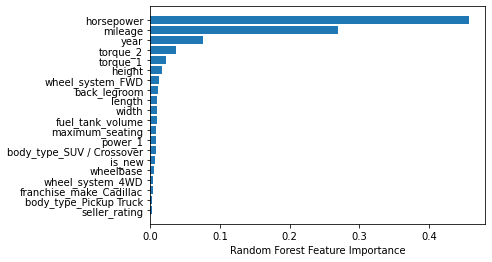

<Figure size 720x3600 with 0 Axes>

In [16]:
sorted_idx = rf.feature_importances_.argsort()
len(sorted_idx)
plt.barh(X_train.columns[sorted_idx][85:], rf.feature_importances_[sorted_idx][85:])
plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(10, 50))

# CatBoost Regressor

In [17]:
from catboost import CatBoostRegressor

In [18]:
catb = CatBoostRegressor(iterations=500)
catb.fit(X_train, y_train)
pred = catb.predict(X_test)
print('r2 of training data:', catb.score(X_train, y_train))
print('r2 of test data:', catb.score(X_test,y_test))
print('mse', mse(pred, y_test))

Learning rate set to 0.209245
0:	learn: 13145.3729416	total: 82.4ms	remaining: 41.1s
1:	learn: 11369.2142898	total: 148ms	remaining: 36.9s
2:	learn: 10101.3138244	total: 213ms	remaining: 35.2s
3:	learn: 9061.3645669	total: 277ms	remaining: 34.3s
4:	learn: 8262.9926493	total: 343ms	remaining: 34s
5:	learn: 7650.0831091	total: 406ms	remaining: 33.5s
6:	learn: 7210.7732187	total: 468ms	remaining: 33s
7:	learn: 6824.5218037	total: 539ms	remaining: 33.1s
8:	learn: 6554.6378532	total: 607ms	remaining: 33.1s
9:	learn: 6349.1815569	total: 659ms	remaining: 32.3s
10:	learn: 6180.2525237	total: 717ms	remaining: 31.9s
11:	learn: 6029.3574398	total: 773ms	remaining: 31.4s
12:	learn: 5885.1650282	total: 842ms	remaining: 31.5s
13:	learn: 5791.1756621	total: 893ms	remaining: 31s
14:	learn: 5700.6034283	total: 944ms	remaining: 30.5s
15:	learn: 5607.9853114	total: 1s	remaining: 30.3s
16:	learn: 5520.2941091	total: 1.06s	remaining: 30.1s
17:	learn: 5433.6938008	total: 1.12s	remaining: 30s
18:	learn: 5351

<Figure size 720x3600 with 0 Axes>

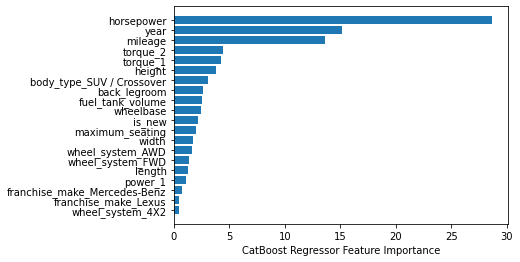

<Figure size 720x3600 with 0 Axes>

In [19]:
sorted_idx = catb.get_feature_importance().argsort()
len(sorted_idx)
plt.barh(X_train.columns[sorted_idx][85:], catb.get_feature_importance()[sorted_idx][85:])
plt.xlabel("CatBoost Regressor Feature Importance")
plt.figure(figsize=(10, 50))

# Gradient Boosting Regression (GBR)

In [20]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV 

In [21]:
# gbr = GridSearchCV (GradientBoostingRegressor (),{
#     'n_estimators': [2000], 'max_depth': [2], 'min_samples_split': [2], 'learning_rate': [0.1],
#     'loss': ['ls'], 'random_state':[72]}, cv=5)
# gbr.fit(X_train, y_train)
# pred = gbr.predict(X_test)
# print('r2 of training data:', gbr.score(X_train, y_train))
# print('r2 of test data:', gbr.score(X_test,y_test))
# print('mse', mse(pred, y_test))